In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
bigdmart = pd.read_csv("bigdatamart_test.csv")

In [3]:
big = pd.read_csv("bigdatamart_test.csv")

In [4]:
bigdmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
bigdmart.shape

(5681, 11)

In [6]:
bigdmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
bigdmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [8]:
columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
for value in columns:
    print(bigdmart[value].unique())

['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
[20.75   8.3   14.6    7.315    nan  9.8   19.35   6.305  5.985 16.6
  6.59   4.785 16.75   6.135 19.85  17.85  13.6    7.1   19.2   13.65
  6.785 13.     5.825 13.8   12.8    9.5   12.5    5.78  10.395 18.35
 21.1   19.75   8.43  15.35   6.71  10.195 11.65  12.85  12.15  18.25
  5.98  12.65  13.1   20.7    7.855 13.35  17.25   8.315 21.35   5.88
  7.435 14.65  14.    18.2   17.6    7.71   7.81  16.35  16.1    5.34
  5.51   6.61   6.38   8.71  17.75   6.44  12.6    7.935 18.5    6.035
 11.8    6.26  16.5   15.7    6.635  8.155  6.175  8.18   8.355  6.905
 20.35  19.25   5.48   5.425 12.1   11.     5.765  5.44   6.13   8.195
 14.15  14.3    5.635  5.73   7.155 15.2   15.25   8.76   9.13  19.6
 10.    11.3    6.57  13.15   4.635 10.6    9.3    7.02   7.825 19.1
  7.51   8.85  17.35  15.15   5.46  13.5    8.275 10.8   15.5    4.905
  9.285  8.97  18.75   8.895  6.89  16.25  13.85  18.     9.21  20.85
 20.25  10.5   15.6   11.6   20.5  

In [9]:
bigdmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### working with categorical and mixed columns
 - itemidentifier divide numbers and aphabets
 - Item fat content - label encoding
 - item-type - label encoding
 - establishment year -dtype - one hot encoding
 - Outlet_Location_Type  - label encoding
 - outlet_type  - one hot encoder


In [10]:
bigdmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
bigdmart_cat = bigdmart[['Item_Identifier',  'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',"Outlet_Size", 'Outlet_Location_Type',
       'Outlet_Type']].copy()
bigdmart_cat.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [12]:
bigdmart_cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [13]:
bigdmart_cat.shape

(5681, 7)

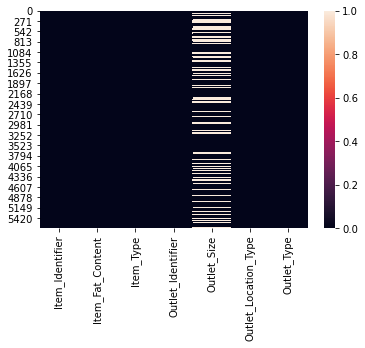

In [14]:
sns.heatmap(bigdmart_cat.isnull())

In [15]:
bigdmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [16]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [17]:
#sets the dataframe to display truncated view
#pd.set_option('display.max_rows', None)

In [18]:
bigdmart_cat["Item_Identifier"].unique

<bound method Series.unique of 0       FDW58
1       FDW14
2       NCN55
3       FDQ58
4       FDY38
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 5681, dtype: object>

In [19]:
bigdmart_cat["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [20]:
sns.set(rc={'figure.figsize':(25,15)})

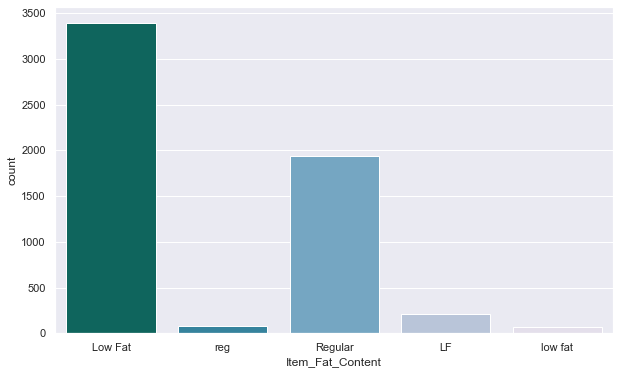

In [21]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=bigdmart_cat, x="Item_Fat_Content", palette = "PuBuGn_r")

In [22]:
 bigdmart_cat["Item_Fat_Content"] =  bigdmart_cat["Item_Fat_Content"].replace("low fat", "Low Fat")

In [23]:
 bigdmart_cat["Item_Fat_Content"] =  bigdmart_cat["Item_Fat_Content"].replace("LF", "Low Fat")

In [24]:
 bigdmart_cat["Item_Fat_Content"] =  bigdmart_cat["Item_Fat_Content"].replace("reg", 'Regular')

In [25]:
 bigdmart_cat["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

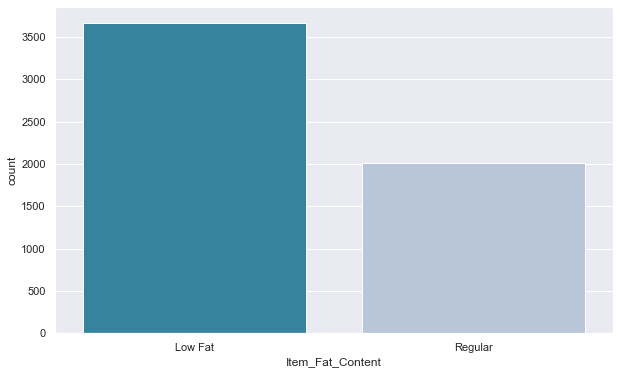

In [26]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=bigdmart_cat, x="Item_Fat_Content", palette = "PuBuGn_r")

In [27]:
print(bigdmart_cat["Item_Fat_Content"].value_counts())

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [28]:
 bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,Regular,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [29]:
bigdmart_cat["Item_Type"].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

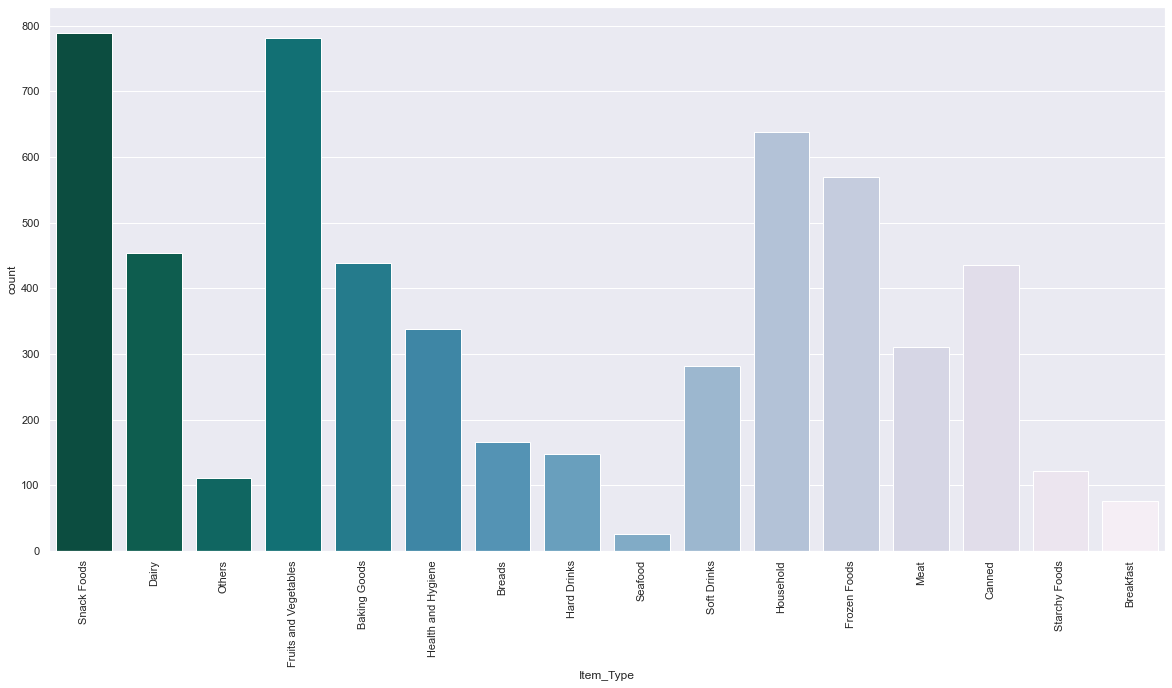

In [30]:
fig_size = (20,10)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Item_Type", palette = "PuBuGn_r")

In [31]:
print(bigdmart_cat["Item_Type"].value_counts())

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


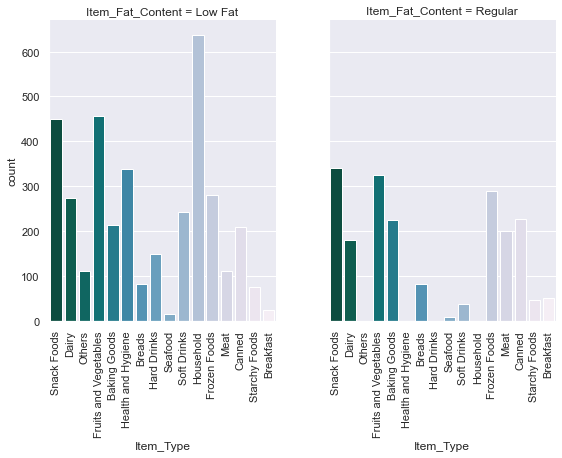

In [32]:
g = sns.catplot(data=bigdmart_cat, x="Item_Type", col="Item_Fat_Content", palette= "PuBuGn_r",kind="count", height=5, aspect=.8)
# set rotation
g.set_xticklabels(rotation=90)


In [33]:
bigdmart_cat["Outlet_Identifier"].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

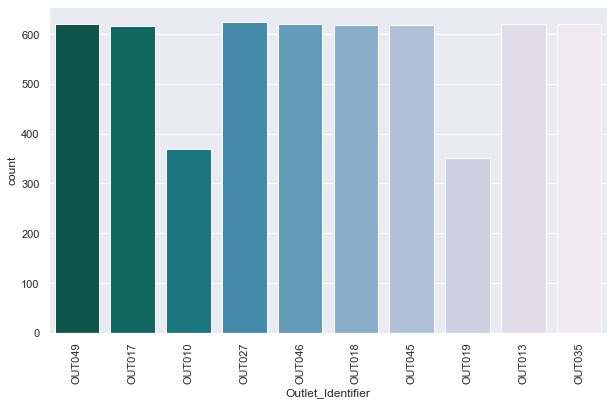

In [34]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Identifier", palette = "PuBuGn_r")

In [35]:
print(bigdmart_cat["Outlet_Identifier"].value_counts())

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64


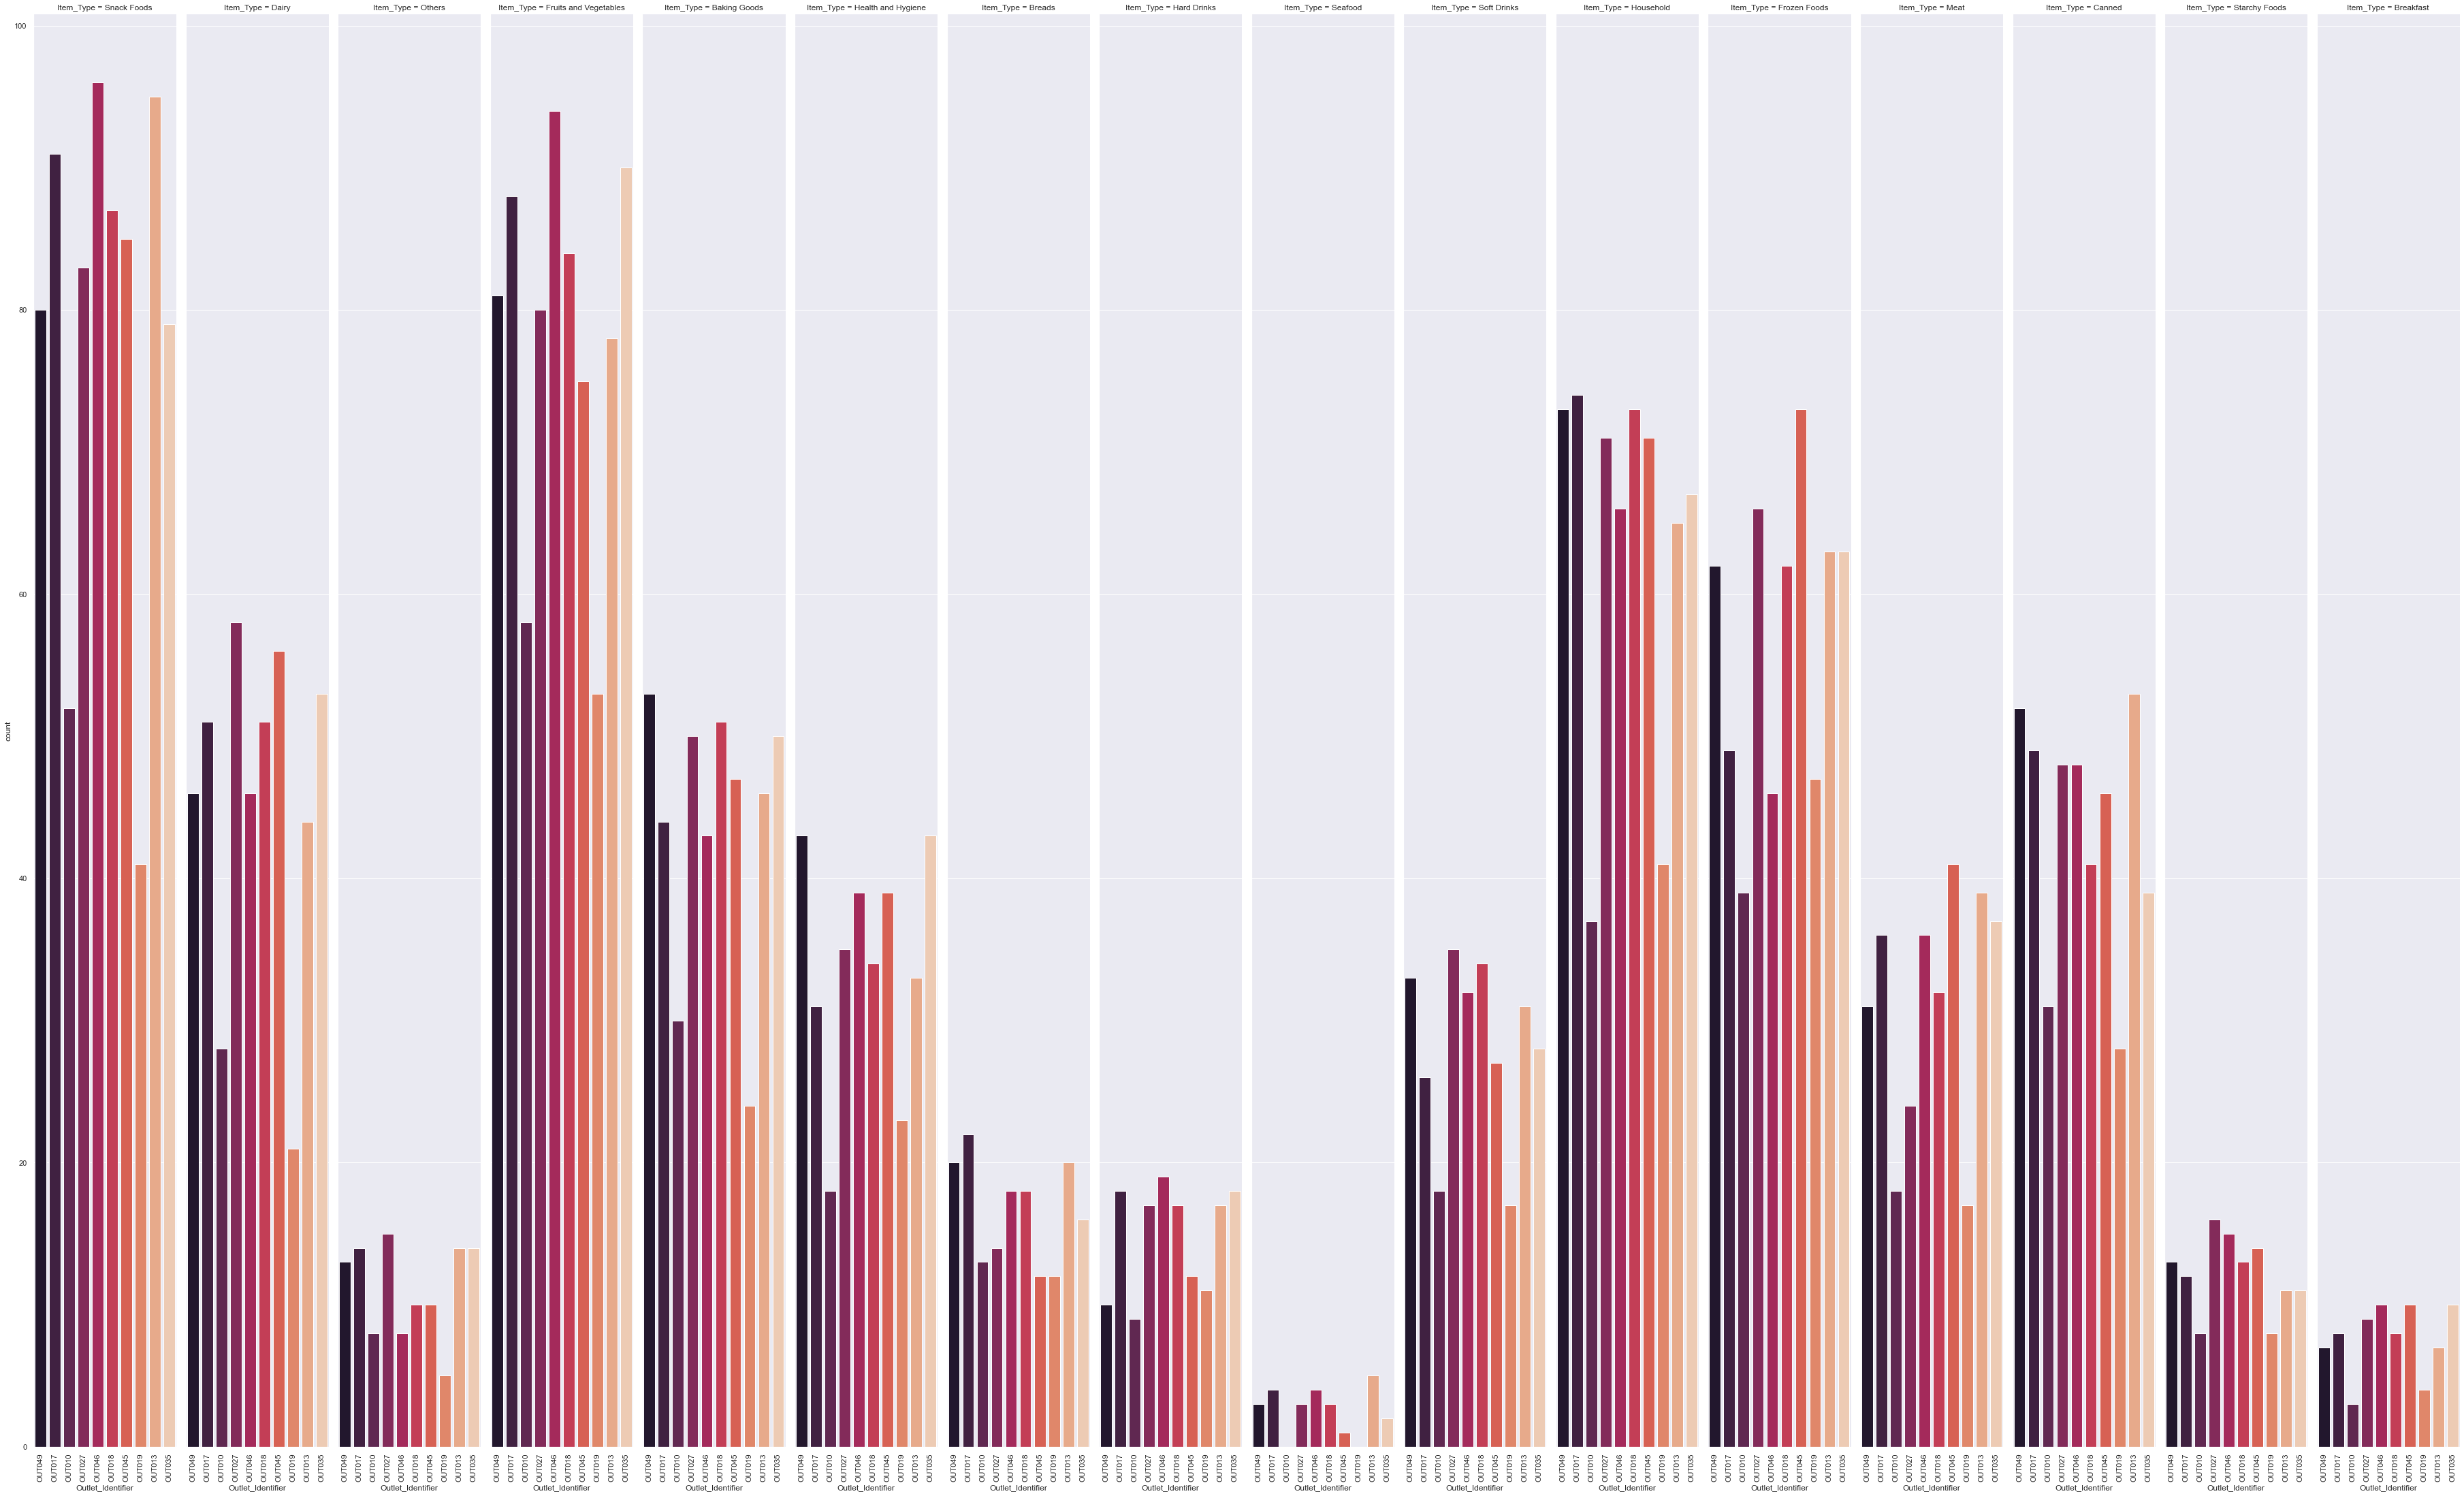

In [36]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Identifier", col="Item_Type", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(50, 35)

In [37]:
bigdmart_cat["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [38]:
bigdmart_cat["Outlet_Size"].isnull().sum()

1606

In [39]:
bigdmart_cat["Outlet_Size"] = bigdmart_cat["Outlet_Size"].fillna(bigdmart_cat["Outlet_Size"].mode()[0])

In [40]:
bigdmart_cat["Outlet_Size"].isnull().sum()

0

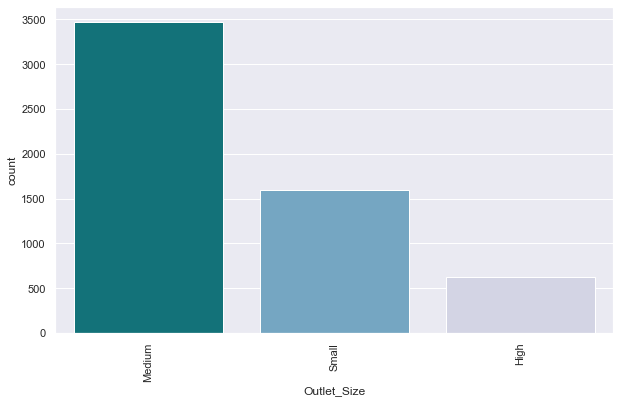

In [41]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Size", palette = "PuBuGn_r")

In [42]:
print(bigdmart_cat["Outlet_Size"].value_counts())

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64


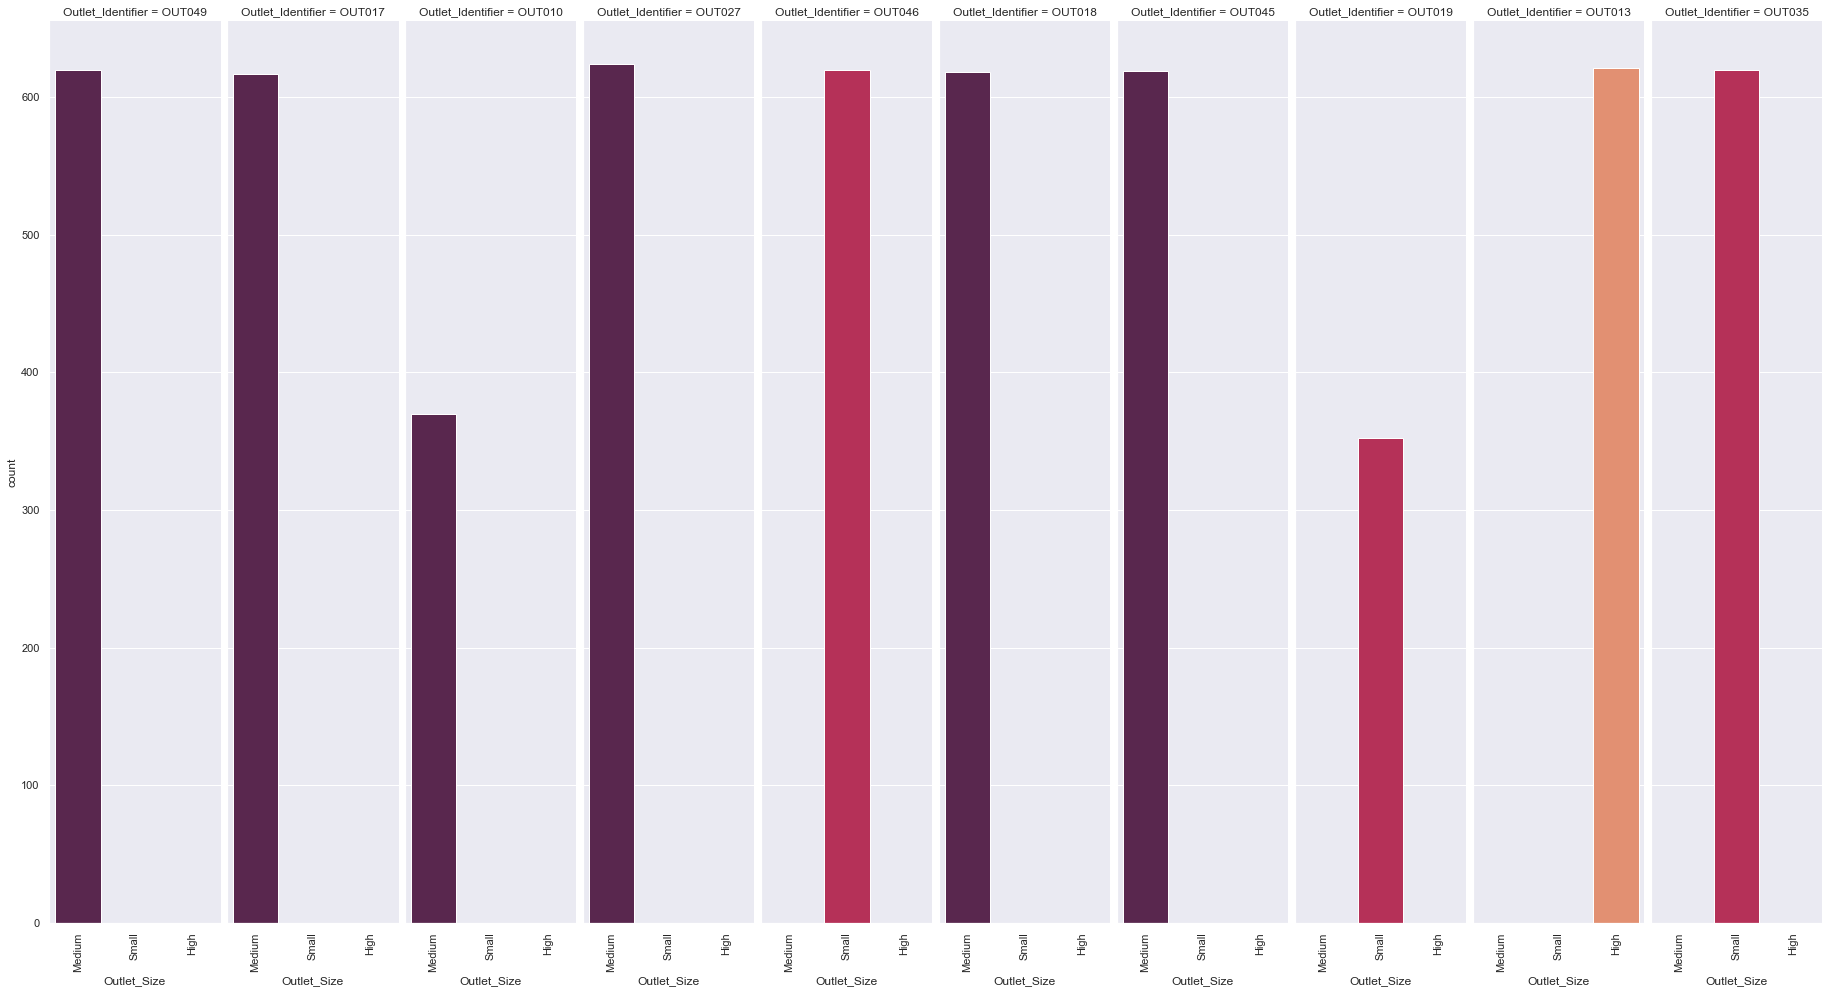

In [43]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Size", col="Outlet_Identifier", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 15)

In [44]:
bigdmart_cat["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [45]:
print(bigdmart_cat["Outlet_Location_Type"].value_counts())

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


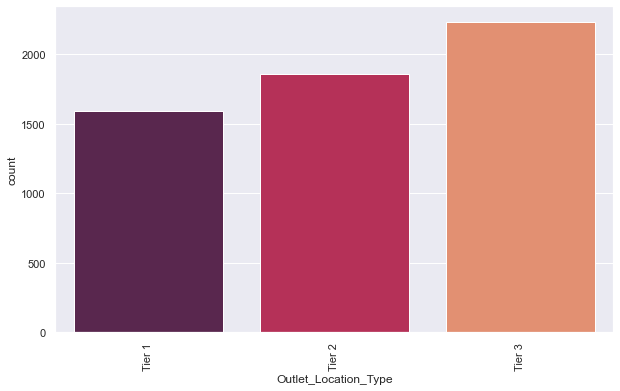

In [46]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Location_Type", palette = "rocket")

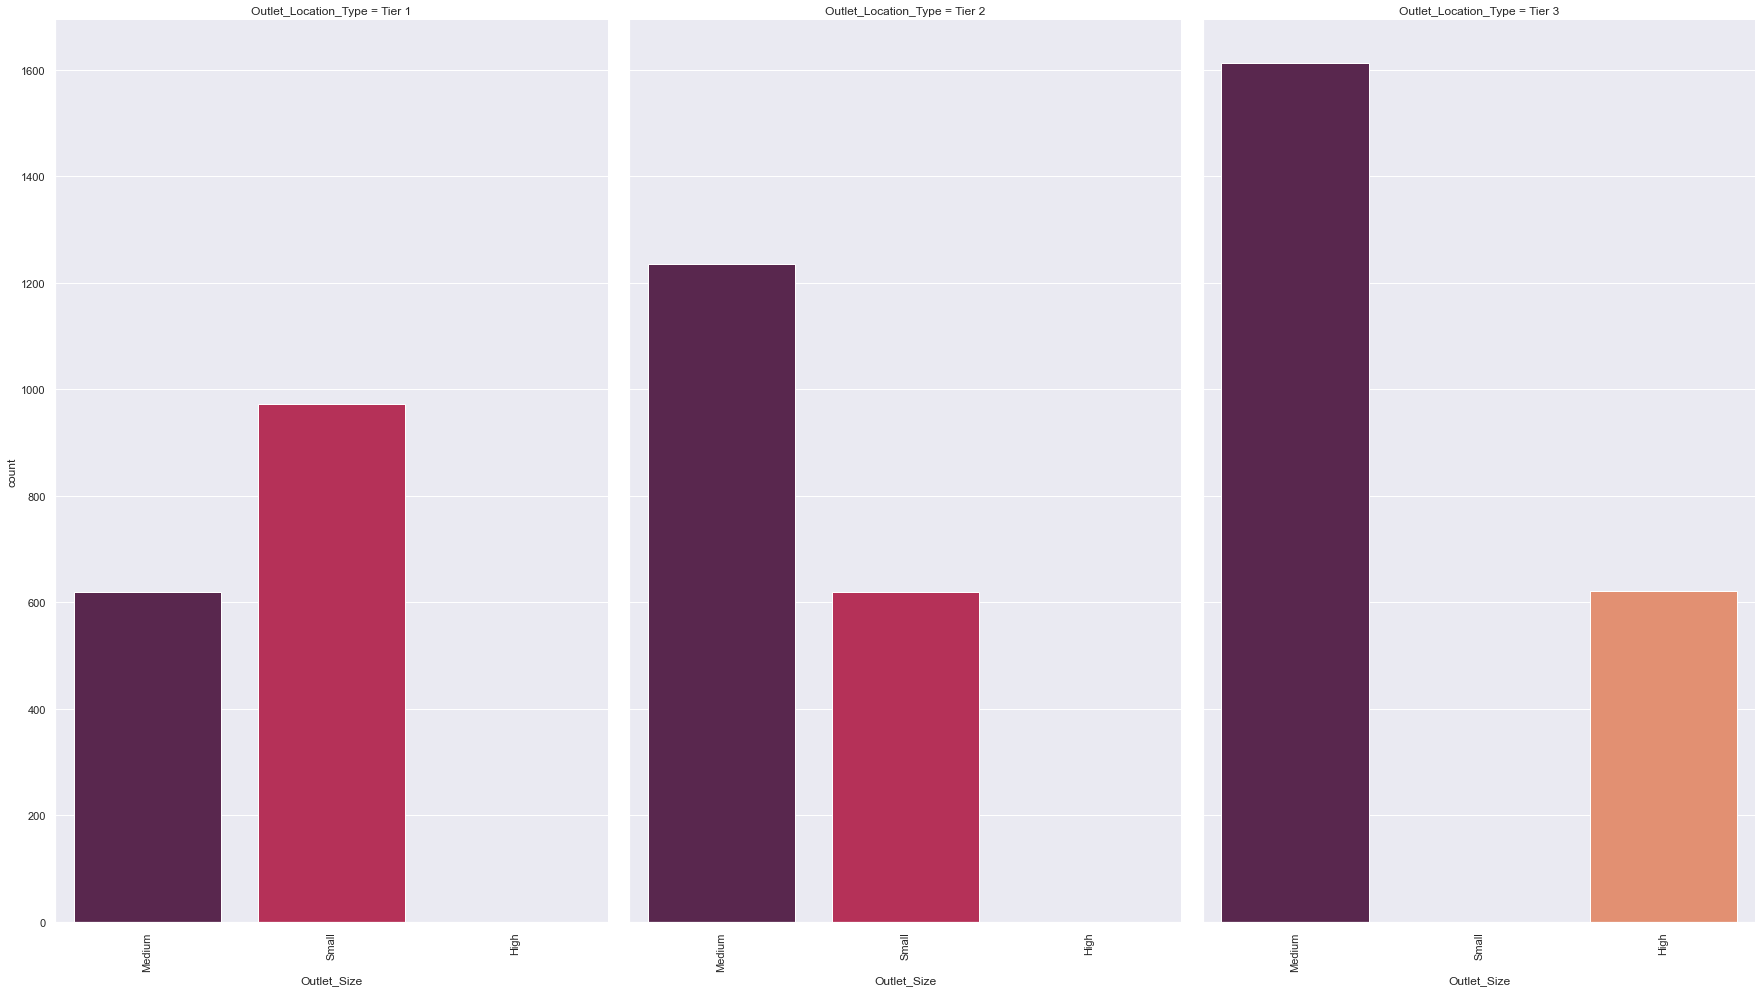

In [47]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Size", col="Outlet_Location_Type", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 15)

In [48]:
#bigdmart_cat = bigdmart_cat.drop("LF", axis=1)

In [49]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,Regular,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [50]:
bigdmart_cat["Outlet_Type"].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [51]:
print(bigdmart_cat["Outlet_Type"].value_counts())

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64


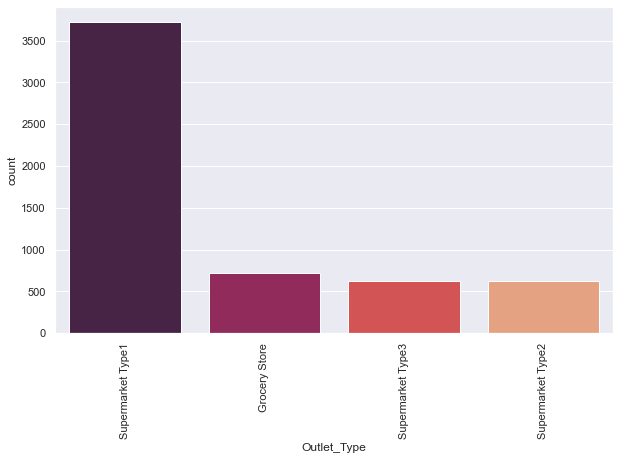

In [52]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
plt.xticks(rotation=90)
sns.countplot(data=bigdmart_cat, x="Outlet_Type", palette = "rocket")

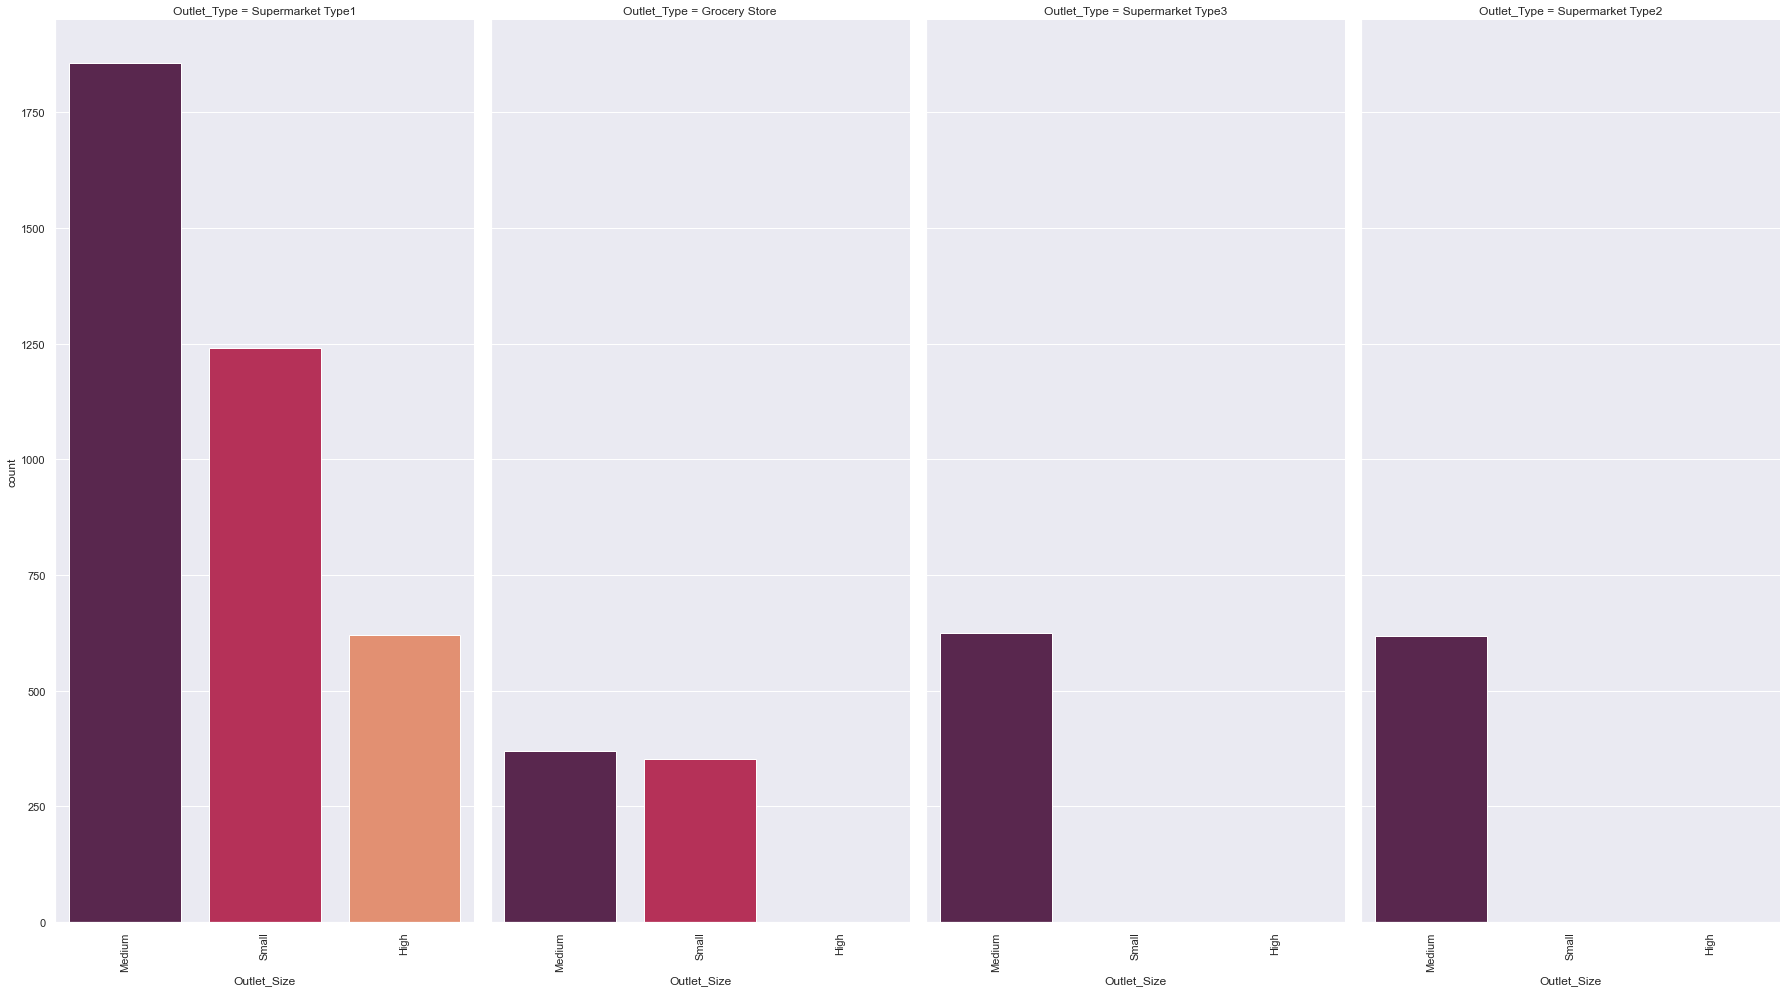

In [53]:
g = sns.catplot(data=bigdmart_cat, x="Outlet_Size", col="Outlet_Type", palette= "rocket",kind="count")
# set rotation
g.set_xticklabels(rotation=90)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 15)

In [54]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,Regular,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [55]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

#intialize label encoder
LE = LabelEncoder()

#change the categorical varaiables to numerical variables
bigdmart_cat["Item_Identifier"] = LE.fit_transform(bigdmart_cat["Item_Identifier"])

In [56]:
bigdmart_cat["Item_Identifier"].head()

0    1103
1    1067
2    1406
3     809
4    1184
Name: Item_Identifier, dtype: int32

In [57]:
bigdmart_cat["Item_Identifier"].dtypes

dtype('int32')

In [58]:
bigdmart_cat["Item_Fat_Content"] = LE.fit_transform(bigdmart_cat["Item_Fat_Content"])
bigdmart_cat["Item_Type"] = LE.fit_transform(bigdmart_cat["Item_Type"])
bigdmart_cat["Outlet_Identifier"] = LE.fit_transform(bigdmart_cat["Outlet_Identifier"])
bigdmart_cat["Outlet_Size"] = LE.fit_transform(bigdmart_cat["Outlet_Size"])

In [59]:
bigdmart_cat.dtypes

Item_Identifier          int32
Item_Fat_Content         int32
Item_Type                int32
Outlet_Identifier        int32
Outlet_Size              int32
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [60]:
bigdmart_cat.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [61]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,0,13,9,1,Tier 1,Supermarket Type1
1,1067,1,4,2,1,Tier 2,Supermarket Type1
2,1406,0,11,0,1,Tier 3,Grocery Store
3,809,0,13,2,1,Tier 2,Supermarket Type1
4,1184,1,4,5,1,Tier 3,Supermarket Type3


In [62]:
#Introducing one hot encoder to convert categorical feature sex 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

new = ohe.fit_transform(bigdmart_cat["Outlet_Location_Type"].values.reshape(-1,1)).toarray()
#concatinating Female, Infant and Male column with the dataframe
new_df = pd.DataFrame(new, columns = [np.unique(big["Outlet_Location_Type"])])
bigdmart_cat = pd.concat([bigdmart_cat, new_df], axis = 1)

In [63]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,"(Tier 1,)","(Tier 2,)","(Tier 3,)"
0,1103,0,13,9,1,Tier 1,Supermarket Type1,1.0,0.0,0.0
1,1067,1,4,2,1,Tier 2,Supermarket Type1,0.0,1.0,0.0
2,1406,0,11,0,1,Tier 3,Grocery Store,0.0,0.0,1.0
3,809,0,13,2,1,Tier 2,Supermarket Type1,0.0,1.0,0.0
4,1184,1,4,5,1,Tier 3,Supermarket Type3,0.0,0.0,1.0


In [64]:
new = ohe.fit_transform(bigdmart_cat["Outlet_Type"].values.reshape(-1,1)).toarray()
#concatinating Female, Infant and Male column with the dataframe
new_df = pd.DataFrame(new, columns = [np.unique(big["Outlet_Type"])])
bigdmart_cat = pd.concat([bigdmart_cat, new_df], axis = 1)

In [65]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,"(Tier 1,)","(Tier 2,)","(Tier 3,)","(Grocery Store,)","(Supermarket Type1,)","(Supermarket Type2,)","(Supermarket Type3,)"
0,1103,0,13,9,1,Tier 1,Supermarket Type1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1067,1,4,2,1,Tier 2,Supermarket Type1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1406,0,11,0,1,Tier 3,Grocery Store,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,809,0,13,2,1,Tier 2,Supermarket Type1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1184,1,4,5,1,Tier 3,Supermarket Type3,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [66]:
bigdmart_cat = bigdmart_cat.drop("Outlet_Location_Type", axis=1)
bigdmart_cat = bigdmart_cat.drop("Outlet_Type", axis=1)

In [67]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,"(Tier 1,)","(Tier 2,)","(Tier 3,)","(Grocery Store,)","(Supermarket Type1,)","(Supermarket Type2,)","(Supermarket Type3,)"
0,1103,0,13,9,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1067,1,4,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1406,0,11,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,809,0,13,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1184,1,4,5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [68]:
bigdmart_cat.columns = ['Item_Identifier',  'Item_Fat_Content', 'Item_Type','Outlet_Identifier',"Outlet_Size",'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store','Supermarket Type 1', 'Supermarket Type 2','Supermarket Type 3']

In [69]:
bigdmart_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store',
       'Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3'],
      dtype='object')

In [70]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3
0,1103,0,13,9,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1067,1,4,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1406,0,11,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,809,0,13,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1184,1,4,5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
int_conv = ['Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store','Supermarket Type 1', 'Supermarket Type 2','Supermarket Type 3']
for value in int_conv:
    bigdmart_cat[value] = bigdmart_cat[value].astype(int)
    

In [72]:
bigdmart_cat.dtypes

Item_Identifier       int32
Item_Fat_Content      int32
Item_Type             int32
Outlet_Identifier     int32
Outlet_Size           int32
Tier 1                int32
Tier 2                int32
Tier 3                int32
Grocery Store         int32
Supermarket Type 1    int32
Supermarket Type 2    int32
Supermarket Type 3    int32
dtype: object

In [73]:
bigdmart_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3
0,1103,0,13,9,1,1,0,0,0,1,0,0
1,1067,1,4,2,1,0,1,0,0,1,0,0
2,1406,0,11,0,1,0,0,1,1,0,0,0
3,809,0,13,2,1,0,1,0,0,1,0,0
4,1184,1,4,5,1,0,0,1,0,0,0,1


In [74]:
bigdmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [75]:
bigdmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [76]:
bigdmart_num = bigdmart[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]].copy()

In [77]:
bigdmart_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [78]:
bigdmart_num.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
dtype: object

In [79]:
bigdmart_num.isnull().sum()

Item_Weight                  976
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
dtype: int64

In [80]:
bigdmart_num["Item_Weight"] = bigdmart_num["Item_Weight"].fillna(bigdmart_num["Item_Weight"].median())

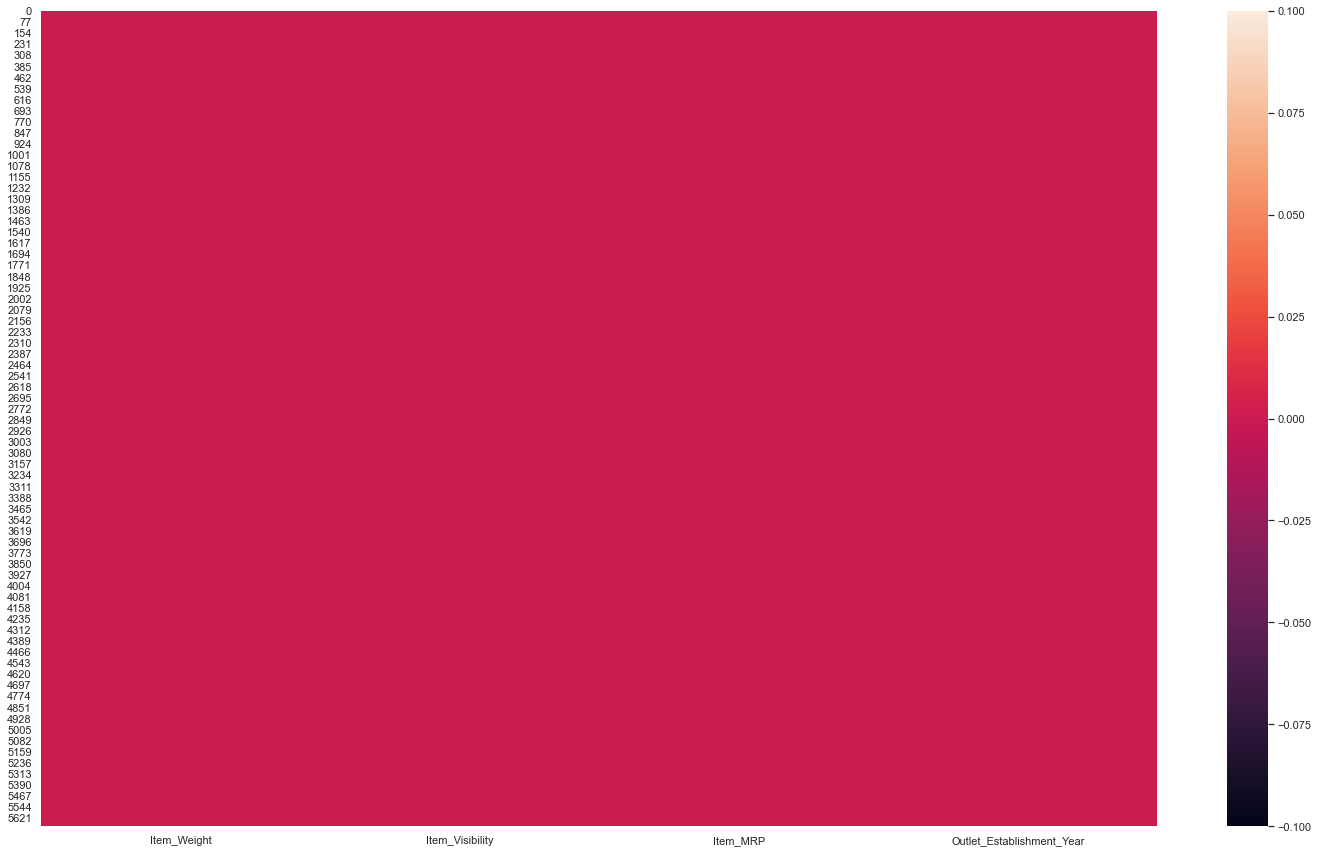

In [81]:
sns.heatmap(bigdmart_num.isnull())

Text(0.5, 1.0, 'Scatter plot comparison item weight and item visibility')

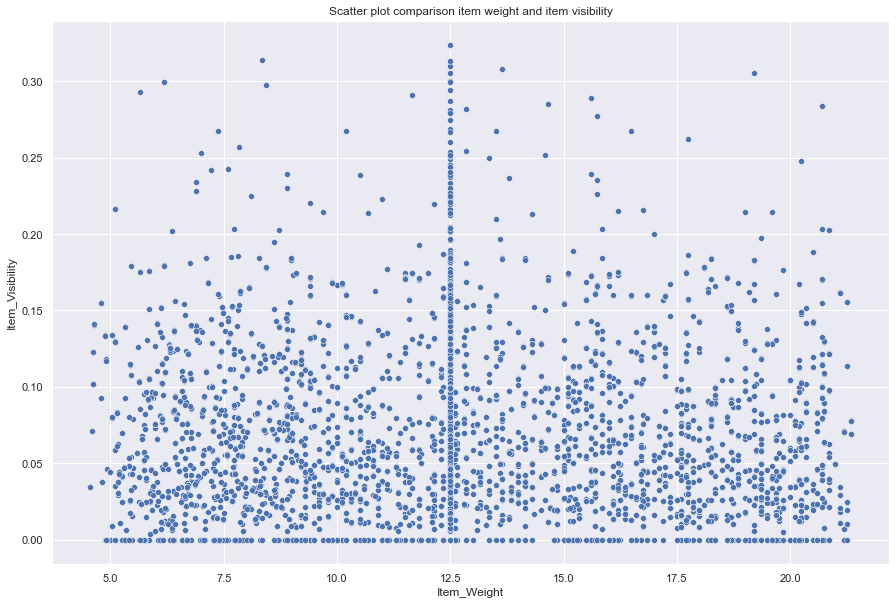

In [82]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Item_Weight', y= 'Item_Visibility', data=bigdmart_num, sizes = 15)
plt.title("Scatter plot comparison item weight and item visibility")

Text(0.5, 1.0, 'Scatter plot comparison item weight and item MRP')

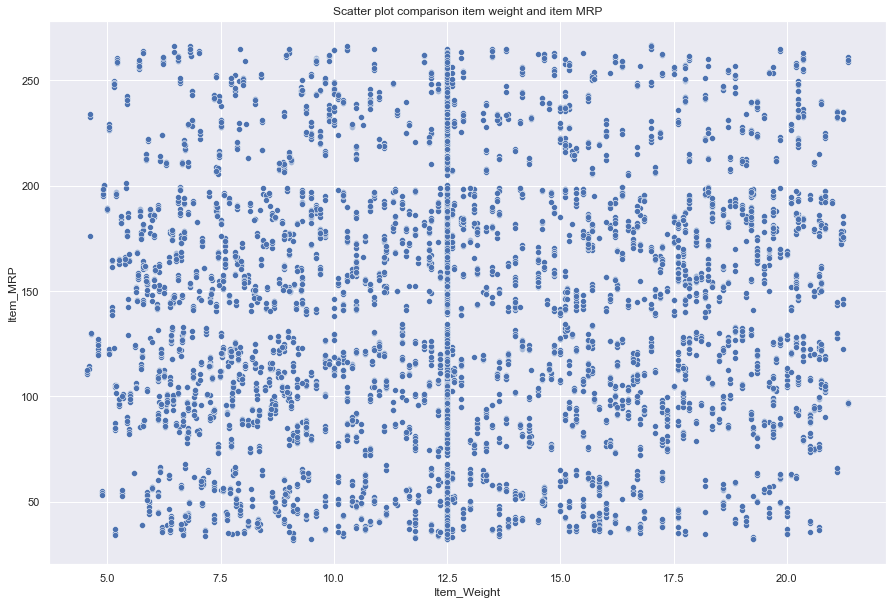

In [83]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Item_Weight', y= 'Item_MRP', data=bigdmart_num, sizes = 15)
plt.title("Scatter plot comparison item weight and item MRP")

In [84]:
bigdmart_num["Outlet_Establishment_Year"] = pd.to_datetime(bigdmart_num["Outlet_Establishment_Year"], format="%Y")
#bigdmart_num["Outlet_Establishment_Year"] = pd.DatetimeIndex(bigdmart_num["Outlet_Establishment_Year"]).year

#bigdmart_num["Outlet_Establishment_Year"] = bigdmart_num["Outlet_Establishment_Year"].dt.year

In [85]:
bigdmart_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999-01-01
1,8.300,0.038428,87.3198,2007-01-01
2,14.600,0.099575,241.7538,1998-01-01
3,7.315,0.015388,155.0340,2007-01-01
4,12.500,0.118599,234.2300,1985-01-01


In [86]:
bigdmart_num.dtypes


Item_Weight                         float64
Item_Visibility                     float64
Item_MRP                            float64
Outlet_Establishment_Year    datetime64[ns]
dtype: object

Text(0.5, 1.0, 'Scatter plot comparison sales and year')

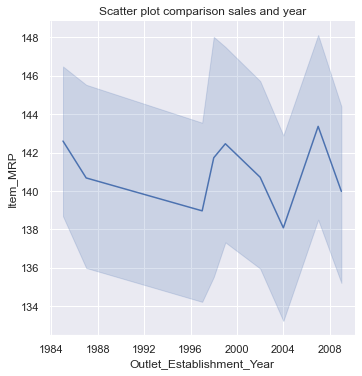

In [87]:
sns.relplot(x='Outlet_Establishment_Year', y= 'Item_MRP', data=bigdmart_num,kind="line", sizes = 15)
plt.title("Scatter plot comparison sales and year")

In [88]:
bigdmart_num["Outlet_Establishment_Year"] = pd.DatetimeIndex(bigdmart_num["Outlet_Establishment_Year"]).year

In [89]:
bigmart = pd.concat([bigdmart_num,bigdmart_cat], axis=1)

In [90]:
bigmart.shape

(5681, 16)

In [91]:
bigmart.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Tier 1', 'Tier 2',
       'Tier 3', 'Grocery Store', 'Supermarket Type 1', 'Supermarket Type 2',
       'Supermarket Type 3'],
      dtype='object')

In [92]:
bigmart.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3
0,20.750,0.007565,107.8622,1999,1103,0,13,9,1,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,1067,1,4,2,1,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,1406,0,11,0,1,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,809,0,13,2,1,0,1,0,0,1,0,0
4,12.500,0.118599,234.2300,1985,1184,1,4,5,1,0,0,1,0,0,0,1


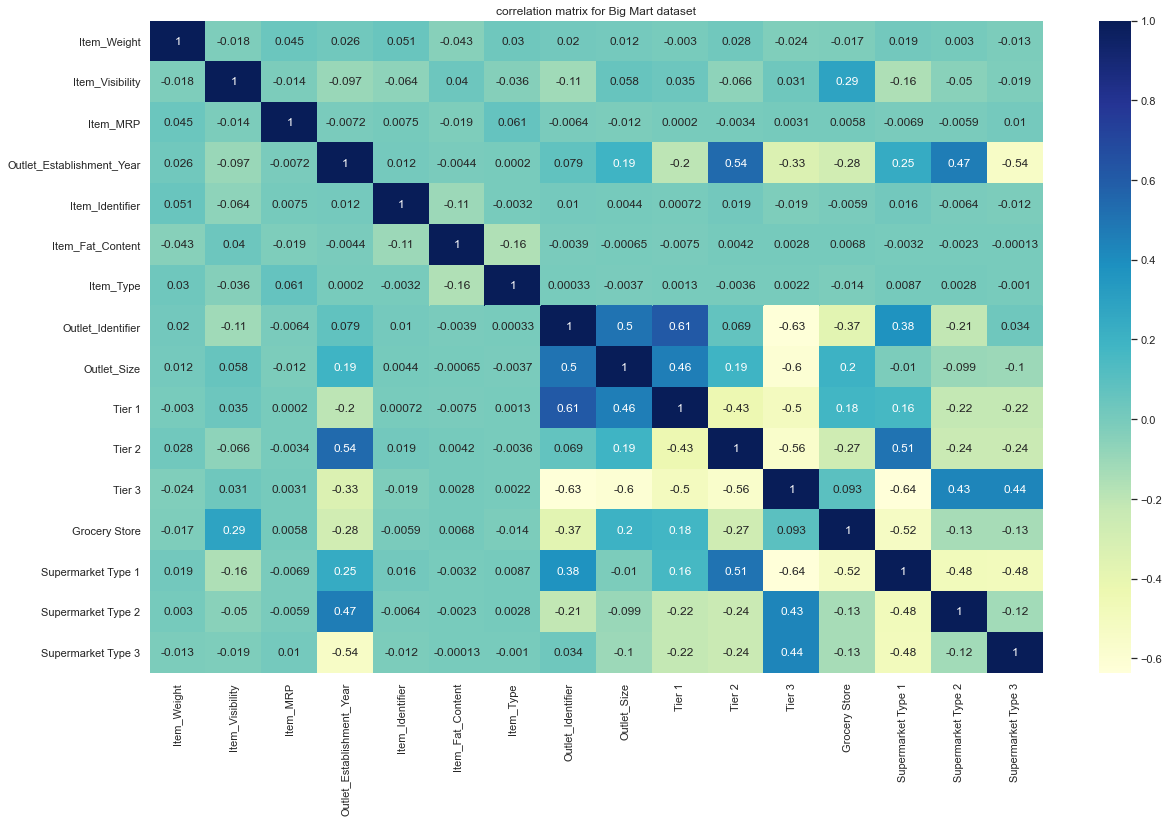

In [93]:
#check the correlation 
corr_mat = bigmart.corr()
plt.figure(figsize=[20,12])
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
plt.title("correlation matrix for Big Mart dataset")
plt.show()

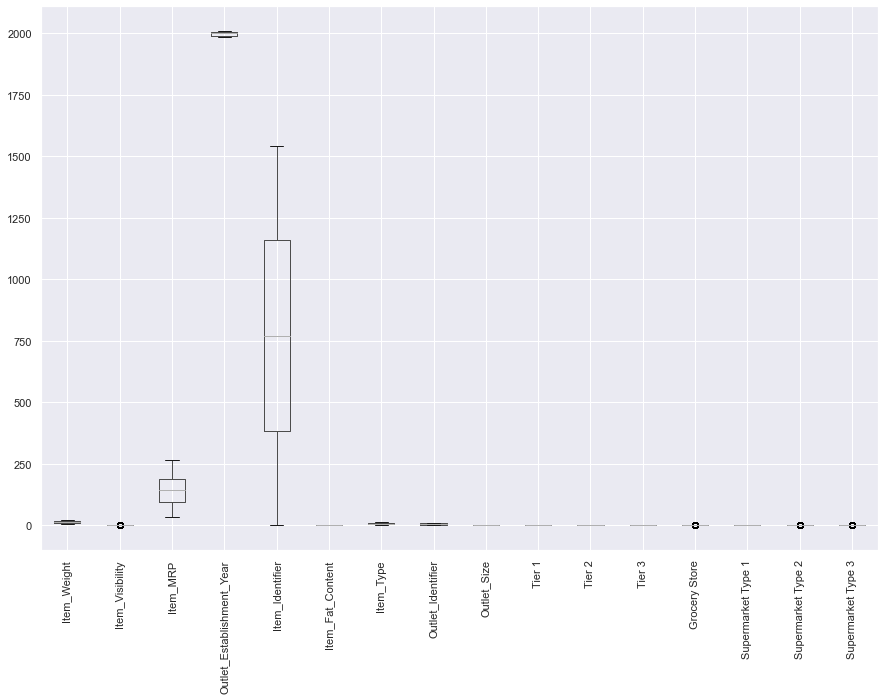

In [94]:
bigmart.boxplot(figsize = [15,10])
plt.xticks(rotation=90)
plt.show()

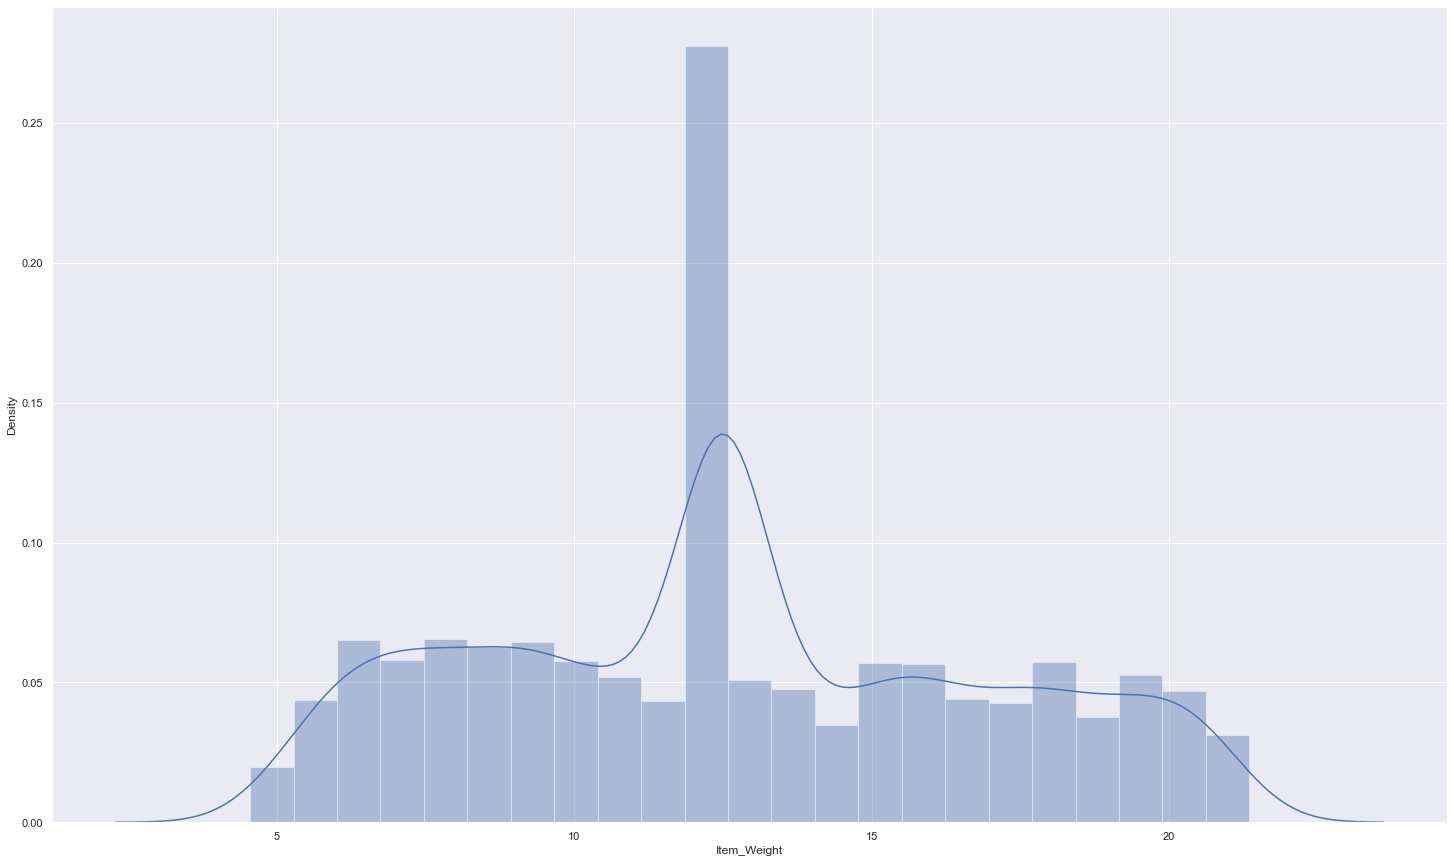

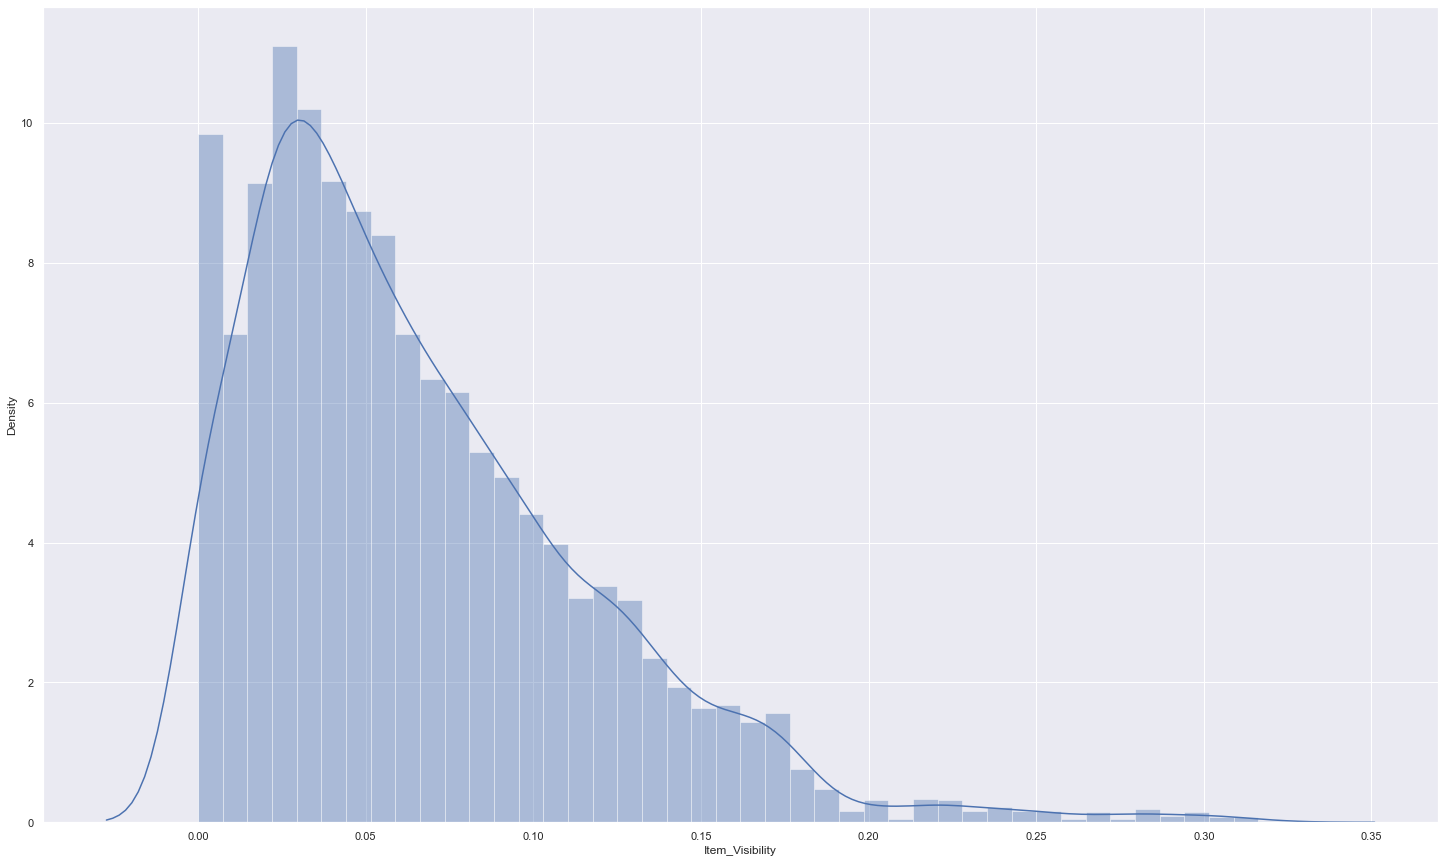

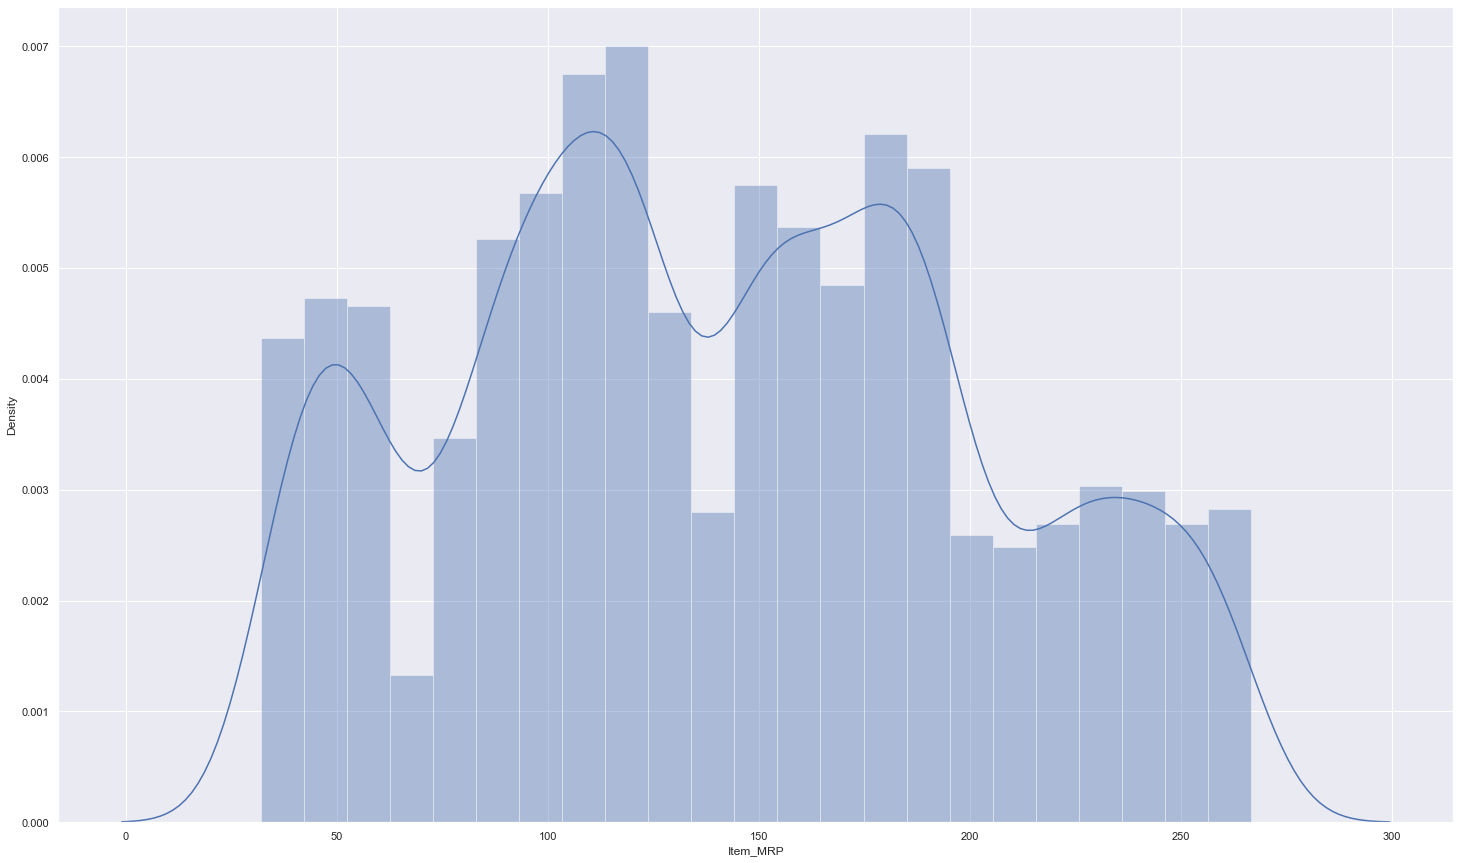

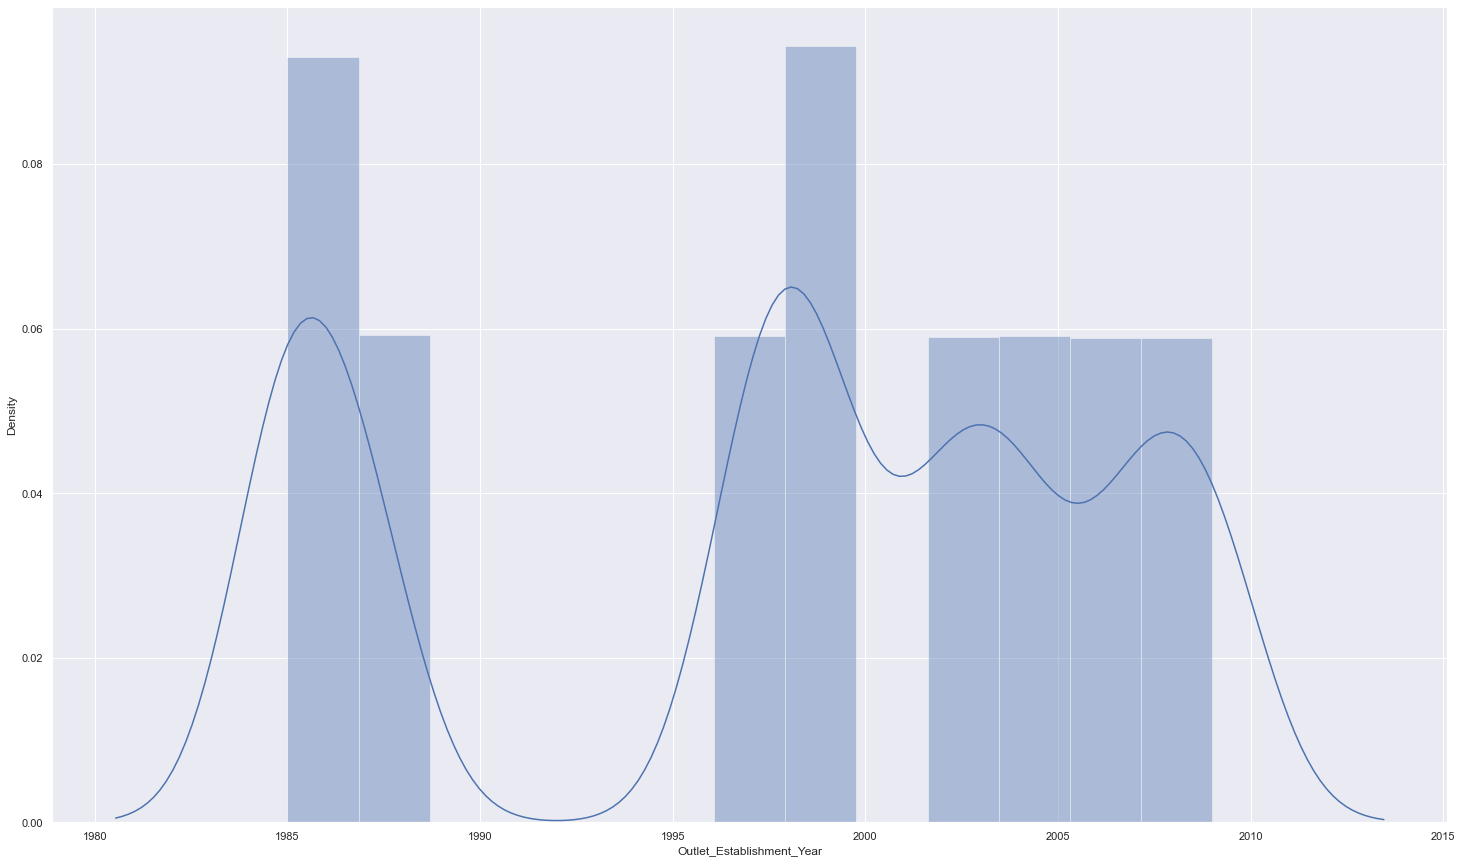

In [95]:
column = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year']
for value in column:
    sns.distplot(bigmart[value],kde=True)
    plt.show()
 

In [96]:
bigmart.skew()

Item_Weight                  0.166489
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Item_Identifier             -0.000020
Item_Fat_Content             0.609223
Item_Type                    0.096486
Outlet_Identifier           -0.060209
Outlet_Size                 -0.087108
Tier 1                       0.978933
Tier 2                       0.739189
Tier 3                       0.437989
Grocery Store                2.239791
Supermarket Type 1          -0.648977
Supermarket Type 2           2.513554
Supermarket Type 3           2.496167
dtype: float64

In [97]:
Item_Visibility = bigmart[["Item_Visibility"]].copy()

In [98]:
Item_Visibility

,Item_Visibility
0,0.007565
1,0.038428
2,0.099575
3,0.015388
4,0.118599
...,...
5676,0.013496
5677,0.142991
5678,0.073529
5679,0.000000


In [99]:
# implementing power transform to remove skewness
from sklearn.preprocessing import power_transform

In [100]:
iv = power_transform(Item_Visibility)
iv = pd.DataFrame(iv, columns= Item_Visibility.columns)

In [101]:
iv.skew()


Item_Visibility    0.116776
dtype: float64

In [102]:

bigmart = bigmart.drop("Item_Visibility", axis=1)

In [103]:
bigmart["Item_Visibility"] = iv

In [104]:
bigmart

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3,Item_Visibility
0,20.750,107.8622,1999,1103,0,13,9,1,1,0,0,0,1,0,0,-1.462069
1,8.300,87.3198,2007,1067,1,4,2,1,0,1,0,0,1,0,0,-0.448019
2,14.600,241.7538,1998,1406,0,11,0,1,0,0,1,1,0,0,0,0.871342
3,7.315,155.0340,2007,809,0,13,2,1,0,1,0,0,1,0,0,-1.175927
4,12.500,234.2300,1985,1184,1,4,5,1,0,0,1,0,0,0,1,1.153823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,141.3154,1997,231,1,13,8,2,1,0,0,0,1,0,0,-1.243150
5677,7.600,169.1448,2009,306,1,15,3,1,0,0,1,0,0,1,0,1.453584
5678,10.000,118.7440,2002,1412,0,8,7,1,0,1,0,0,1,0,0,0.397868
5679,15.300,214.6218,2007,517,1,3,2,1,0,1,0,0,1,0,0,-1.760234


In [105]:
bigmart.dtypes

Item_Weight                  float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Identifier                int32
Item_Fat_Content               int32
Item_Type                      int32
Outlet_Identifier              int32
Outlet_Size                    int32
Tier 1                         int32
Tier 2                         int32
Tier 3                         int32
Grocery Store                  int32
Supermarket Type 1             int32
Supermarket Type 2             int32
Supermarket Type 3             int32
Item_Visibility              float64
dtype: object

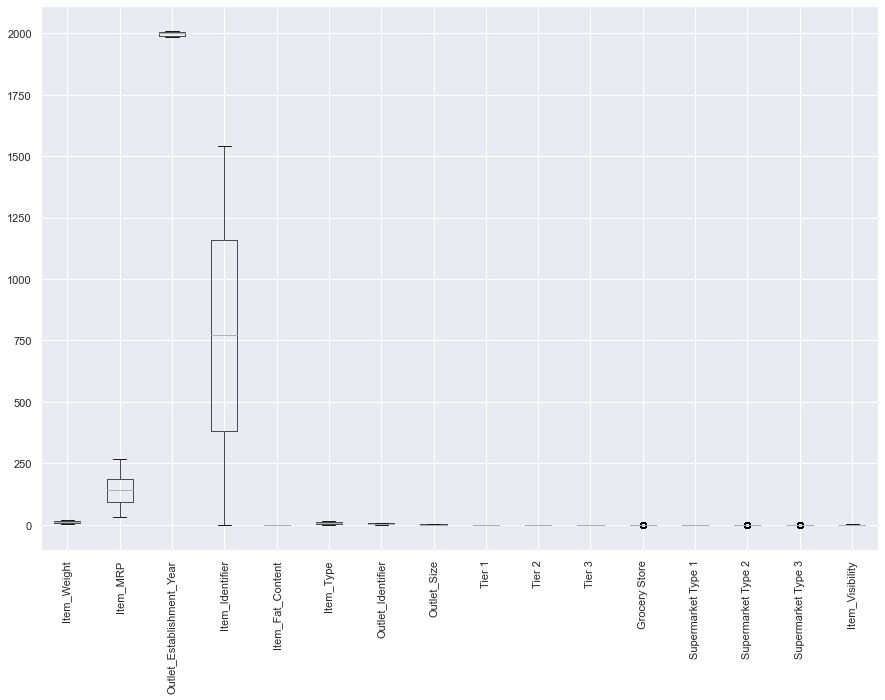

In [106]:
bigmart.boxplot(figsize = [15,10])
plt.xticks(rotation=90)
plt.show()

In [107]:
#plt.boxplot(bigmart["Item_Outlet_Sales"])

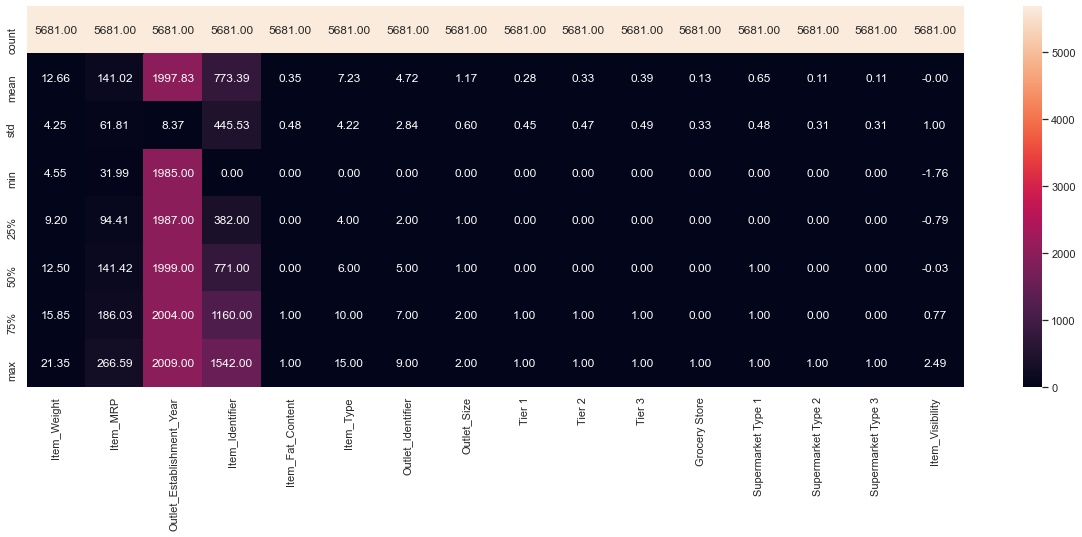

In [108]:
# using heatmap to verify summary statistics
plt.figure(figsize =(21, 7))
sns.heatmap(bigmart.describe(), annot=True, linecolor = "black", fmt="0.2f")

In [109]:
bigmart = pd.DataFrame(bigmart, columns= bigmart.columns)

In [110]:
bigmart

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type 1,Supermarket Type 2,Supermarket Type 3,Item_Visibility
0,20.750,107.8622,1999,1103,0,13,9,1,1,0,0,0,1,0,0,-1.462069
1,8.300,87.3198,2007,1067,1,4,2,1,0,1,0,0,1,0,0,-0.448019
2,14.600,241.7538,1998,1406,0,11,0,1,0,0,1,1,0,0,0,0.871342
3,7.315,155.0340,2007,809,0,13,2,1,0,1,0,0,1,0,0,-1.175927
4,12.500,234.2300,1985,1184,1,4,5,1,0,0,1,0,0,0,1,1.153823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,141.3154,1997,231,1,13,8,2,1,0,0,0,1,0,0,-1.243150
5677,7.600,169.1448,2009,306,1,15,3,1,0,0,1,0,0,1,0,1.453584
5678,10.000,118.7440,2002,1412,0,8,7,1,0,1,0,0,1,0,0,0.397868
5679,15.300,214.6218,2007,517,1,3,2,1,0,1,0,0,1,0,0,-1.760234


In [111]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

bigmart = scale.fit_transform(bigmart)

#scaled 


In [113]:
import joblib
import pickle 
Big_Mart_Lasso= pickle.load(open("lasso_cvmodel.pkl","rb"))
   

UnpicklingError: invalid load key, '\x00'.